# Lab 2: Markov Decision Problems

# Exercise 1: Grid World
Compute the value funnction for the example 4.1 in the book.







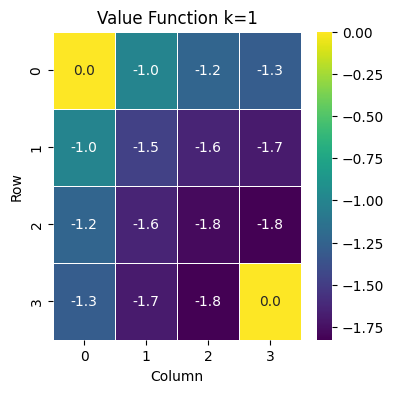

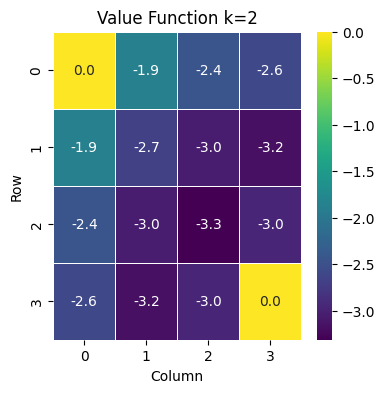

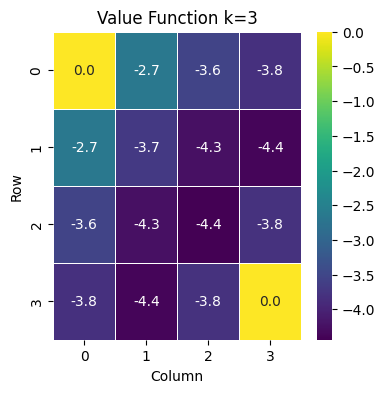

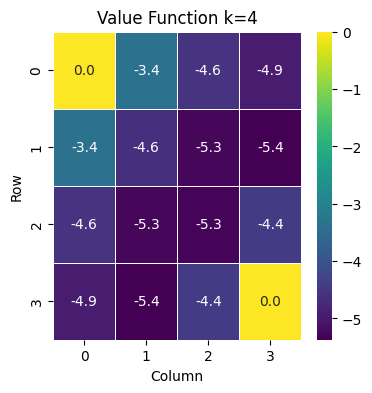

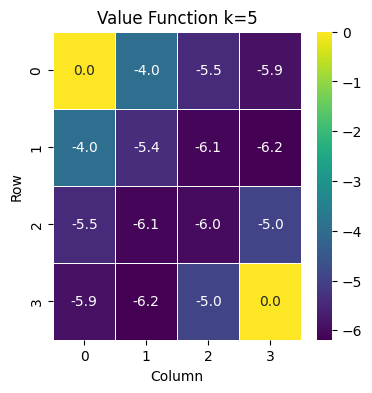

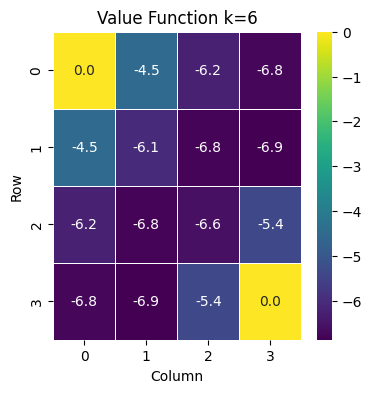

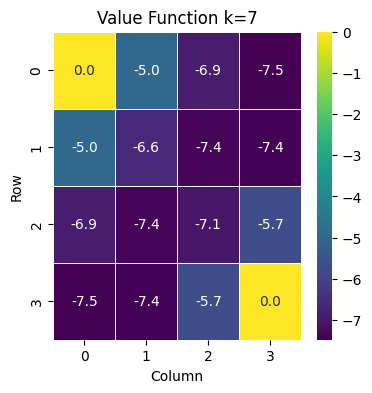

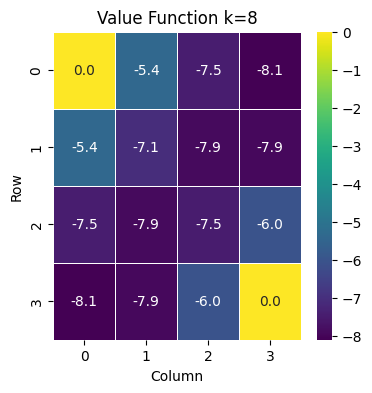

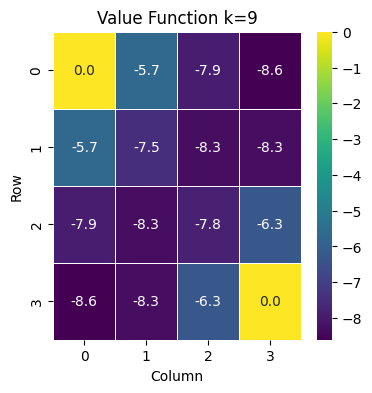

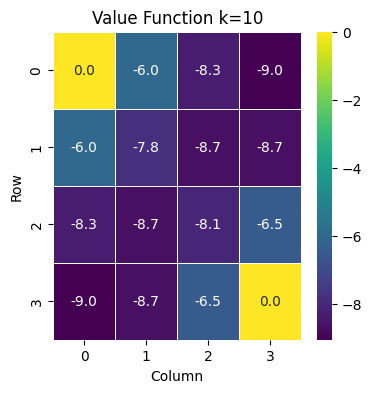

In [4]:

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


V = np.zeros(16)
gamma = 0.95  # Discount factor
V_old = np.zeros(16)


n = 4

def step(state, action):
    row, col = divmod(state, n)
    if action == 0:  # up
        new_row, new_col = max(row - 1, 0), col
    elif action == 1:  # down
        new_row, new_col = min(row + 1, n - 1), col
    elif action == 2:  # left
        new_row, new_col = row, max(col - 1, 0)
    elif action == 3:  # right
        new_row, new_col = row, min(col + 1, n - 1)
    new_state = new_row * n + new_col
    reward = -1
    return new_state, reward


for k in range(10):
  delta = 0
  for s in range(16):

    if s==0 or s==15:
      continue

    #### Write your code here #########
    actions = [0, 1, 2, 3]
    values = []
    v = V[s]
    for a in actions:
        s_next, r = step(s, a)
        values.append(r + gamma * V[s_next])

    V[s] = np.mean(values)
    delta = max(delta, abs(v - V[s]))


  ###### PLOT
  # Reshape the 1D value function array into an 8x8 grid
  V_grid = V.reshape((4, 4))

  # Plot the value function as a heatmap
  plt.figure(figsize=(4, 4))
  sns.heatmap(V_grid, annot=True, cmap="viridis", fmt=".1f", linewidths=.5)
  plt.title("Value Function k=%d"%(k+1))
  plt.xlabel("Column")
  plt.ylabel("Row")
  plt.show()

# Exercise 2: Grid World
Compute the optimal policy




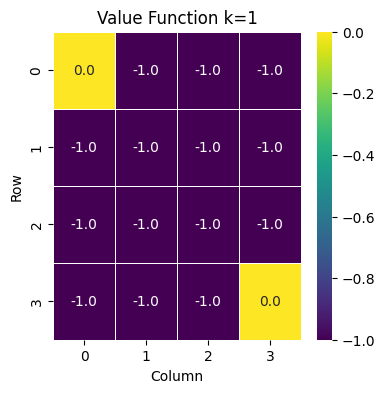

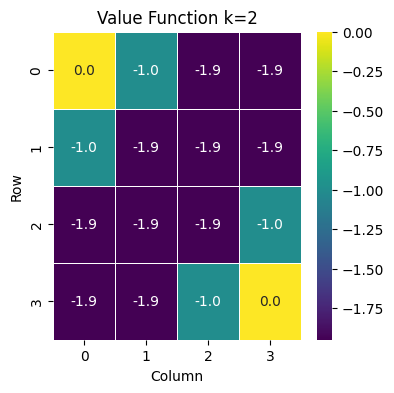

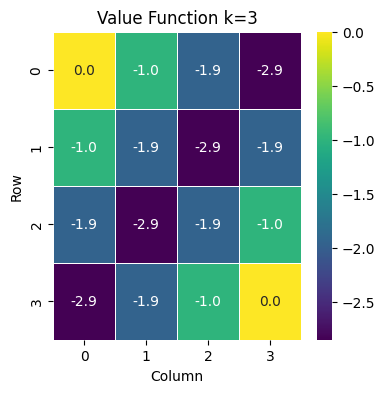

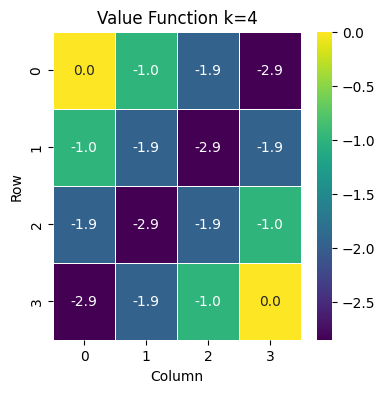

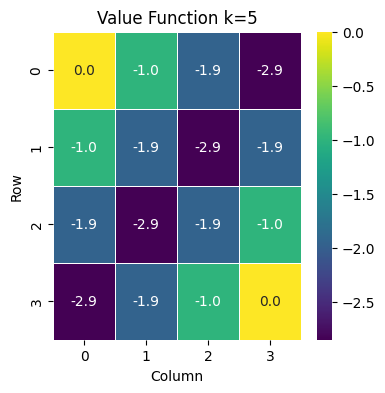

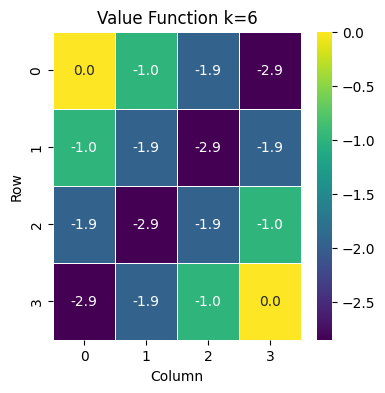

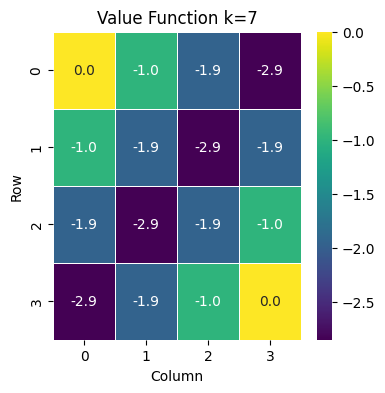

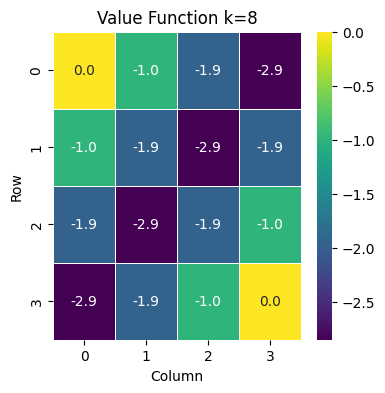

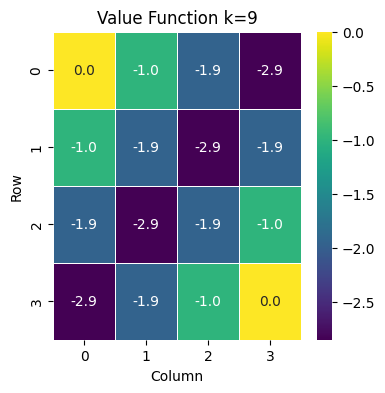

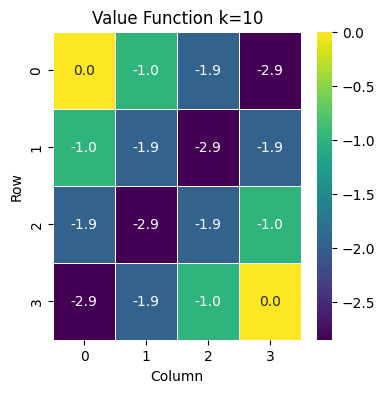

In [8]:
V = np.zeros(16)
gamma = 0.95  # Discount factor
V_old = np.zeros(16)


n = 4

def step(state, action):
    row, col = divmod(state, n)
    if action == 0:  # up
        new_row, new_col = max(row - 1, 0), col
    elif action == 1:  # down
        new_row, new_col = min(row + 1, n - 1), col
    elif action == 2:  # left
        new_row, new_col = row, max(col - 1, 0)
    elif action == 3:  # right
        new_row, new_col = row, min(col + 1, n - 1)
    new_state = new_row * n + new_col
    reward = -1
    return new_state, reward


for k in range(10):
  delta = 0
  for s in range(16):

    if s==0 or s==15:
      continue

    #### Write your code here #########
    actions = [0, 1, 2, 3]
    values = []
    v = V[s]
    for a in actions:
        s_next, r = step(s, a)
        values.append(r + gamma * V[s_next])

    V[s] = np.max(values)
    delta = max(delta, abs(v - V[s]))


  ###### PLOT
  # Reshape the 1D value function array into an 8x8 grid
  V_grid = V.reshape((4, 4))

  # Plot the value function as a heatmap
  plt.figure(figsize=(4, 4))
  sns.heatmap(V_grid, annot=True, cmap="viridis", fmt=".1f", linewidths=.5)
  plt.title("Value Function k=%d"%(k+1))
  plt.xlabel("Column")
  plt.ylabel("Row")
  plt.show()

Optimal Value Function:
[[ 0.     -1.     -1.95   -2.8525]
 [-1.     -1.95   -2.8525 -1.95  ]
 [-1.95   -2.8525 -1.95   -1.    ]
 [-2.8525 -1.95   -1.      0.    ]]

Optimal Policy:
[['T' '←' '←' '↓']
 ['↑' '↑' '↑' '↓']
 ['↑' '↑' '↓' '↓']
 ['↑' '→' '→' 'T']]


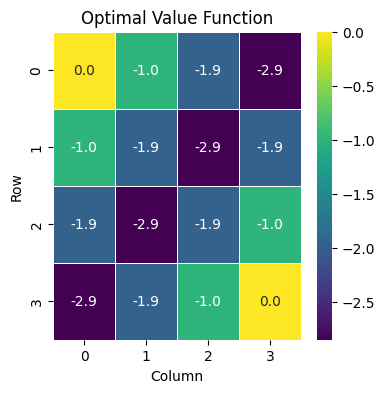

In [9]:

# ---- Extract Optimal Policy ----
policy = np.full(16, -1)  # -1 = terminal
for s in range(16):
    if s == 0 or s == 15:
        continue
    actions = [0, 1, 2, 3]
    values = []
    for a in actions:
        s_next, r = step(s, a)
        values.append(r + gamma * V[s_next])
    policy[s] = np.argmax(values)  # best action

# ---- Pretty Print Policy ----
action_symbols = {0: "↑", 1: "↓", 2: "←", 3: "→", -1: "T"}
policy_grid = np.array([action_symbols[a] for a in policy]).reshape((n, n))

print("Optimal Value Function:")
print(V.reshape((n, n)))
print("\nOptimal Policy:")
print(policy_grid)

# ---- Plot Value Function ----
plt.figure(figsize=(4, 4))
sns.heatmap(V.reshape((n, n)), annot=True, cmap="viridis", fmt=".1f", linewidths=.5)
plt.title("Optimal Value Function")
plt.xlabel("Column")
plt.ylabel("Row")
plt.show()

# Exercise 3: Grid World
In the following gym environment, compute the value function using Monte Carlo.

Run the following code in your local machine. You can run in on colab, but you will not see the animation.

In [5]:
## Install https://github.com/damat-le/gym-simplegrid
!pip install gym_simplegrid

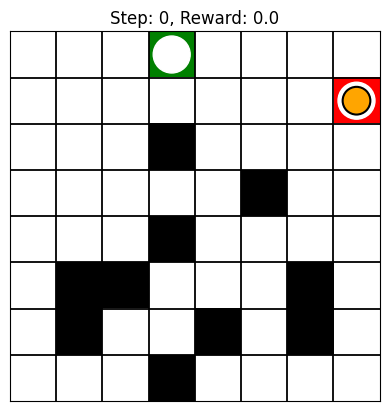

Location (2,7) t=0 reward=0.0
Location (3,7) t=1 reward=0.0
Location (4,7) t=2 reward=0.0
Location (4,6) t=3 reward=0.0
Location (4,6) t=4 reward=-1.0
Location (4,5) t=5 reward=0.0
Location (5,5) t=6 reward=0.0
Location (5,4) t=7 reward=0.0
Location (4,4) t=8 reward=0.0
Location (3,4) t=9 reward=0.0


In [6]:

import gymnasium as gym
import gym_simplegrid

START_LOC = 15
GOAL_LOC = 3
# Define the initial location and the goal location in the grid.
# Each grid cell has an a number from 0 to 63.
options ={
    'start_loc': START_LOC,
    'goal_loc': GOAL_LOC
}

env = gym.make('SimpleGrid-8x8-v0', render_mode='human')
obs, info = env.reset(seed=1, options=options)
done = env.unwrapped.done

for t in range(10):
    if done:
        break
    action = env.action_space.sample()   # Random action
    obs, reward, done, _, info = env.step(action)

    grid_size = 8
    row = obs // grid_size
    col = obs % grid_size
    print("Location (", row, ",", col, ") t=",t, " reward=", reward, sep="")

# env.close()